In [1]:
#Importing librairies

#Data Transformation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Opening the data

In [2]:
#Generate a DataFrame
df = pd.read_pickle('airline_carrier_performance_dataset')

#Show the 5 first lines of the dataset
df.head(5)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,1998.0,1.0,1.0,2.0,5.0,1998-01-02,NW,19386.0,NW,N297US,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009.0,2.0,5.0,28.0,4.0,2009-05-28,FL,20437.0,FL,N946AT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013.0,2.0,6.0,29.0,6.0,2013-06-29,MQ,20398.0,MQ,N665MQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.0,3.0,8.0,31.0,2.0,2010-08-31,DL,19790.0,DL,N6705Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006.0,1.0,1.0,15.0,7.0,2006-01-15,US,20355.0,US,N504AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#See the last 5 lines of the dataset
df.tail()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
1999996,1999.0,1.0,1.0,5.0,2.0,1999-01-05,CO,19704.0,CO,N14308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999997,2003.0,4.0,11.0,14.0,5.0,2003-11-14,US,20355.0,US,N528AU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999998,2012.0,2.0,5.0,15.0,2.0,2012-05-15,WN,19393.0,WN,N281WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999999,2003.0,2.0,4.0,29.0,2.0,2003-04-29,UA,19977.0,UA,N364UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000000,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#First look into the dataset
print("Shape:", df.shape, "\n"
      "Duplicated:", df.duplicated().sum(), "\n"
      "Null:", (df.isnull().sum(axis=1) == df.shape[1]).sum())

Shape: (2000001, 109) 
Duplicated: 0 
Null: 1


## Cleaning the data

In [5]:
#Eliminate rows where all the values are missing
df.dropna(axis = 0, how='all', inplace=True)
df.dropna(axis = 1, how='all', inplace=True)

#Eliminate Duplicates
df.drop_duplicates(inplace=True)

#Control the shape of the DataFrame
print("New Shape:", df.shape)

New Shape: (2000000, 85)


We create a mapping of airline id to a more readable airline name.

In [6]:
#We create a dictionary of DOT_ID_Reporting_Airline according to their names
airline_dict = {
    19386: 'Southwest Airlines',
    20437: 'United Airlines',
    20398: 'Delta Air Lines',
    19790: 'American Airlines',
    20355: 'JetBlue Airways',
    19704: 'Alaska Airlines',
    20363: 'Spirit Airlines',
    20378: 'Frontier Airlines',
    19393: 'Hawaiian Airlines',
    19805: 'Allegiant Air',
    20304: 'Sun Country Airlines',
    19977: 'SkyWest Airlines',
    19822: 'Mesa Airlines',
    19930: 'Republic Airways',
    20366: 'PSA Airlines',
    20452: 'Endeavor Air',
    20397: 'ExpressJet Airlines',
    19991: 'Envoy Air',
    20211: 'Atlas Air',
    20404: 'Piedmont Airlines',
    20409: 'CommutAir',
    19690: 'Alitalia',
    20374: 'Allegiant Air',
    20416: 'Mesa Airlines',
    20436: 'SkyWest Airlines',
    19391: 'Southwest Airlines',
    19707: 'Delta Air Lines',
    20368: 'Frontier Airlines',
    20417: 'Endeavor Air',
    21171: 'ABX Air',
    20312: 'Hawaiian Airlines',
    19678: 'American Airlines',
    20384: 'Sun Country Airlines',
    20295: 'Atlas Air'
}

#Create a column 'airline_name' and do the mapping from 'DOT_ID_Reporting_Airline'
df['airline_name'] = df['DOT_ID_Reporting_Airline'].map(lambda x: airline_dict.get(x, 'Unknown'))

## Analyzing the data

Date min: 1987-10-01 00:00:00 
Date max: 2020-03-31 00:00:00


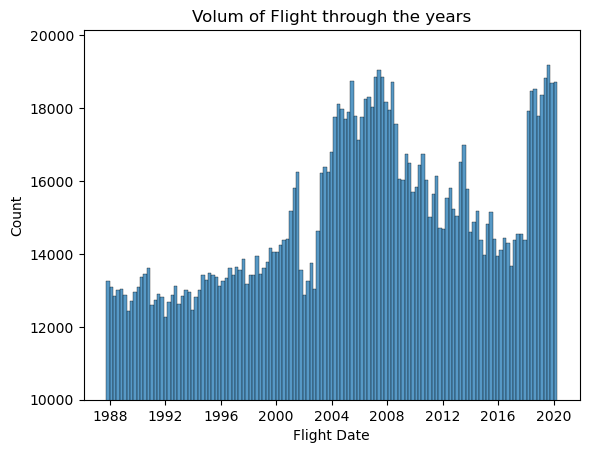

In [7]:
#Min and Max date of the data
print("Date min:", df['FlightDate'].min(), "\n"
      "Date max:", df['FlightDate'].max())

#Plotting histogram
sns.histplot(df, x='FlightDate')
plt.xlabel('Flight Date')
plt.ylabel('Count')
plt.title('Volum of Flight through the years')

# Set y-axis lower limit to 100k
plt.ylim(10000, plt.ylim()[1])

plt.show()

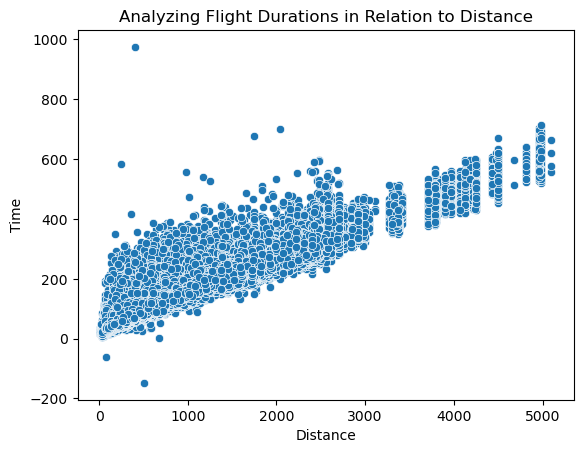

In [8]:
#Relation between time in the air distance covered
sns.scatterplot(data=df, x='Distance', y='ActualElapsedTime')
plt.title('Analyzing Flight Durations in Relation to Distance')
plt.xlabel('Distance')
plt.ylabel('Time')
plt.show()

Proportion of flights delayed:
 0.0    0.830364
1.0    0.169636
Name: DepDel15, dtype: float64


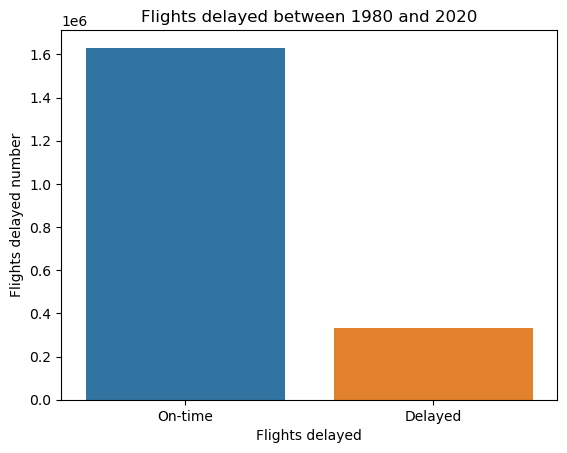

In [9]:
#Proportion of flight delayed
print("Proportion of flights delayed:\n",
       df['DepDel15'].value_counts(normalize=True))

#Plotting chart
sns.countplot(data=df, x='DepDel15')
plt.xlabel('Flights delayed')
plt.xticks([0, 1], ['On-time', 'Delayed'])
plt.ylabel('Flights delayed number')
plt.title('Flights delayed between 1980 and 2020')
plt.show()

We can observe that 83% of the flights are considered as On-Time.

Mean: 54.50684668351573 
Median: 35.0


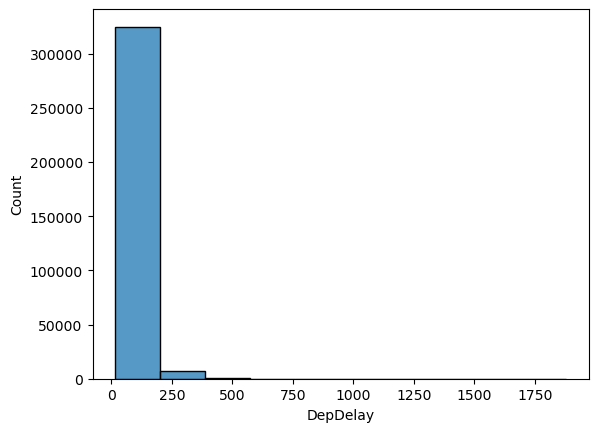

In [14]:
#Filtering the dataset to observe the flights with delay:
sns.histplot(data=df[df['DepDel15'] == 1], x='DepDelay', bins=10)

#Mean and Median of delay:

print('Mean:', df[df['DepDel15'] == 1]['DepDelay'].mean(),
      '\nMedian:', df[df['DepDel15'] == 1]['DepDelay'].median())

In [24]:
print('Percentile 10th:',np.percentile(df[df['DepDel15'] == 1]['DepDelay'], 10),
    '\nPercentile 25th:',np.percentile(df[df['DepDel15'] == 1]['DepDelay'], 25),
    '\nPercentile 50th:',np.percentile(df[df['DepDel15'] == 1]['DepDelay'], 50),
    '\nPercentile 75th:',np.percentile(df[df['DepDel15'] == 1]['DepDelay'], 75),
    '\nPercentile 90th:',np.percentile(df[df['DepDel15'] == 1]['DepDelay'], 90)
    )

Percentile 10th: 17.0 
Percentile 25th: 22.0 
Percentile 50th: 35.0 
Percentile 75th: 65.0 
Percentile 90th: 113.0


We can observe that the majority of the flight delay are mostly under one hour. Indeed, almost half the delayed are under 30 minuts and almost 75% of the delay flights are under 60 minuts.

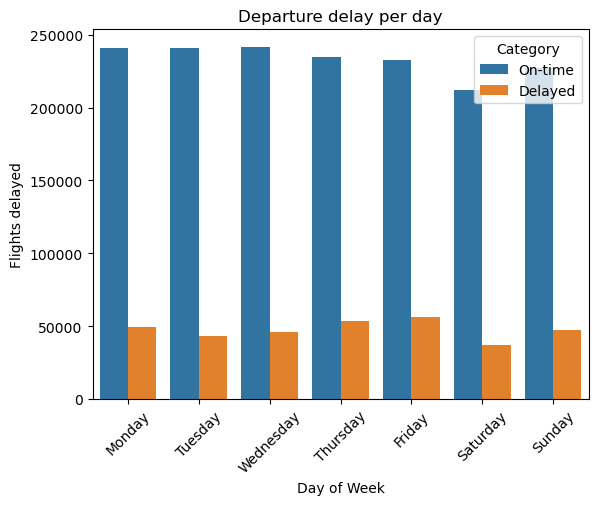

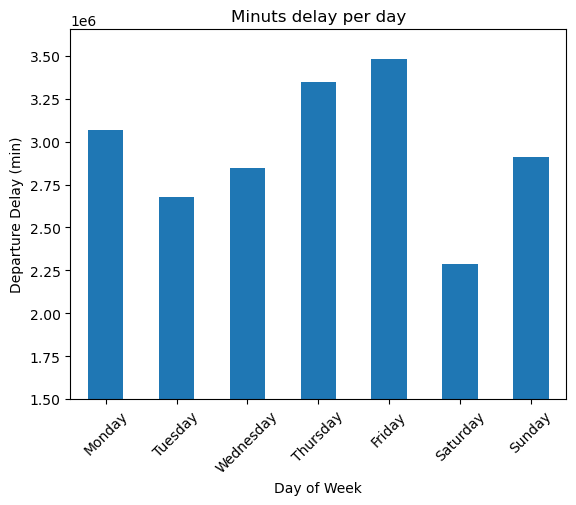

In [25]:
#Graph 1
#Proportion of flights delayed in the week
sns.countplot(x='DayOfWeek', hue='DepDel15', data=df)
#X parameters
plt.xlabel('Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
#Y parameters
plt.ylabel('Flights delayed')
#Legend
plt.legend(['On-time', 'Delayed'], title='Category')
#Title
plt.title('Departure delay per day')
plt.show()

#-----------------------------------------------------

#Graph2
#Flights delayed in per day in minutes
df.groupby('DayOfWeek')['DepDelayMinutes'].sum().plot(kind='bar')

#X parameters
plt.xlabel('Day of Week')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)

#Y parameters
plt.ylabel('Departure Delay (min)')
plt.ylim(1500000, plt.ylim()[1])

#Title
plt.title('Minuts delay per day')

plt.show()

We observe that there during the week almost the same number of flights per day. But we see that there is an important difference in total delays per day. The day with the highest total amount of delay are thursday and friday. In another hand, the day with less amount of delay is by far saturday.

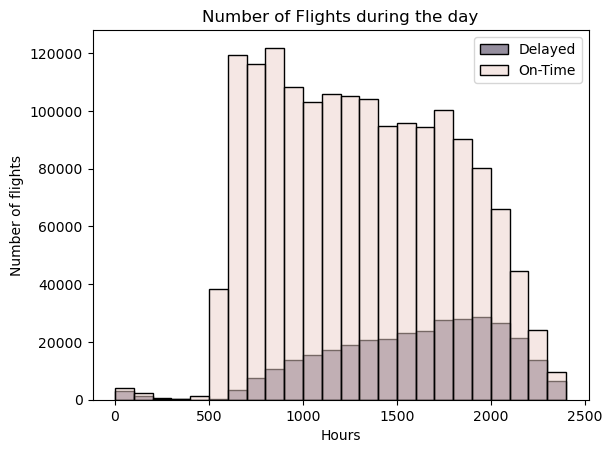

In [27]:
#Generating an histogram of the difference between On-Time and Delayed flight per hour
sns.histplot(data=df, x='DepTime', bins=24, hue='DepDel15')
plt.xlabel('Hours')
plt.ylabel('Number of flights')
plt.legend(['Delayed', 'On-Time'])
plt.title('Number of Flights during the day')
plt.show()

We can see that the flights start really from 5am to finish before 2am. The delayed flights seems to rise from 5am until 8pm. After, 6 pm the number of flight in an hour fall heavily. We observe an augmentation of the proportion of delayed flights until 2 am where almost all the flights are leaving with delay.

Let's dive into the main reason in cause of delayed flights:

The US Bureau of Transportation Statistics records minutes of delay for five possible causes of flight arrival delays: carrier, weather, NAS, security, and late arrival. 

1. Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew leg

2. Late Aircraft Delay : Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

3. NAS Delay : Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS and are also reported through OPSNET.

4. Security Delay : Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

5. Weather Delay : Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

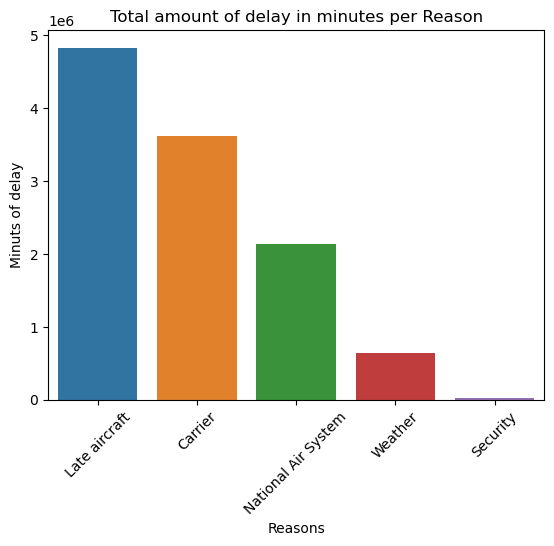

In [28]:
#Generating the dataframe
df_reasons_delay = df.groupby('DepDel15')[['CarrierDelay',	'WeatherDelay',	'NASDelay',	'SecurityDelay', 'LateAircraftDelay']].sum().loc[1,:]
df_reasons_delay.sort_values(ascending=False, inplace=True)
df_reasons_delay = df_reasons_delay.reset_index()
df_reasons_delay.rename(columns={'index': 'reason', 1.0 : 'minutes'}, inplace=True)

#Plotting
sns.barplot(data=df_reasons_delay, x='reason', y='minutes')
plt.xlabel('Reasons')
plt.xticks([0, 1, 2, 3, 4], ['Late aircraft', 'Carrier', 'National Air System', 'Weather', 'Security'], rotation=45)
plt.ylabel('Minuts of delay')
plt.title('Total amount of delay in minutes per Reason')
plt.show()


We observe that the most important source of delay is for a late aircraft. That make sense with the previous plot we saw.

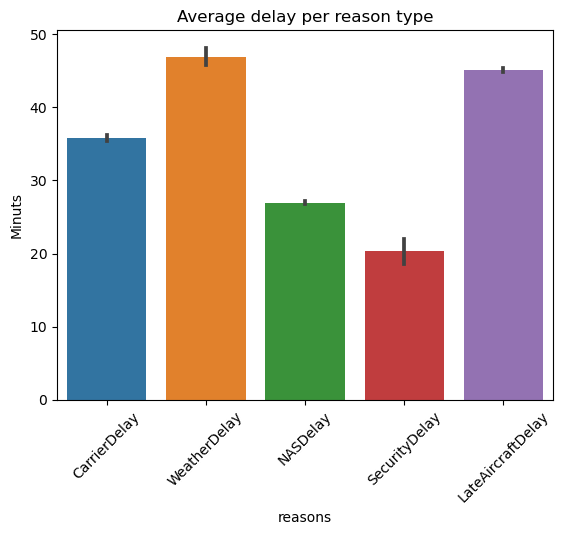

In [30]:
#Generation of the average delay per reason plot:
melted_df = pd.melt(df, value_vars=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], var_name='reasons')
melted_df.replace(0.0, np.nan, inplace=True)
melted_df.dropna(inplace=True)
sns.barplot(melted_df, x='reasons', y='value')
plt.xticks(rotation=45)
plt.ylabel('Minuts')
plt.title('Average delay per reason type')
plt.show()

We saw that the most important source of delay was a late aircraft, the average delay time is around 43 minuts.
The reason generating the highest average delay is because of a delay generated because of a bad weather with 47 minuts.
In the other hand, the reason generating the smalest average delay is because of a Security delay with 20minuts.